#### Loading data

In [1]:
suppressPackageStartupMessages(source("../tree_helper.R"))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(phangorn))

metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/SRR_Acc_List.txt")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
samples <- metaData$RUN
files <- file.path(quantDir, samples, "quant.sf")
colData <- cbind(data.frame(files = files, names = samples), condition = as.factor(metaData$TissueName))

saveDir <- "../environment/mouseMuscle"
clustFile <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_EDL_MAST/term_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/no_threshold0/cluster_nwk.txt"

tseCons <- beaveR::buildTSE(treeTermFile = clustFile, coldata = colData)
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)

yAll <- beaveR::computeSizeFactors(tseCons)
yAll <- beaveR::scInfReps(yAll)
yAll <- fishpond::labelKeep(yAll)
metadata(yAll)[["infRepsScaled"]] <- TRUE

yTxps <- fishpond::swish(tseCons[1:l,],x="condition")
yInn <- fishpond::swish(tseCons[(l+1):nrow(yAll),],x="condition")

load(file.path(saveDir,  "trenDiDegNodes.RData"))
load(file.path(saveDir,  "detNodes.RData"))

reading tree

importing quantifications

reading in files with read.delim (install 'readr' package for speed up)

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Mus musculus - release M25 ]

loading existing TxDb created: 2023-02-17 18:26:37

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

loading existing transcript ranges created: 2023-02-17 18:26:39

fetching genome info for GENCODE

Missing txps 2380

Aggregation Started

Aggregation Ended

Setting inf rep depth to mean depth



Progress:   1 on 100Progress:   2 on 100Progress:   3 on 100Progress:   4 on 100Progress:   5 on 100Progress:   6 on 100Progress:   7 on 100Progress:   8 on 100Progress:   9 on 100Progress:  10 on 100Progress:  11 on 100Progress:  12 on 100Progress:  13 on 100Progress:  14 on 100Progress:  15 on 100Progress:  16 on 100Progress:  17 on 100Progress:  18 on 100Progress:  19 on 100Progress:  20 on 100Progress:  21 on 100Progress:  22 on 100Progress:  23 on 100Progress:  24 on 100Progress:  25 on 100Progress:  26 on 100Progress:  27 on 100Progress:  28 on 100Progress:  29 on 100Progress:  30 on 100Progress:  31 on 100Progress:  32 on 100Progress:  33 on 100Progress:  34 on 100Progress:  35 on 100Progress:  36 on 100Progress:  37 on 100Progress:  38 on 100Progress:  39 on 100Progress:  40 on 100Progress:  41 on 100Progress:  42 on 100Progress:  43 on 100Progress:  44 on 100Progress:  45 on 100Progress:  46 on 100Progress:  47 on 100Progress:  48 on 100Progress:  49 on 100Progress:  50 on 100

### Plotting the trenDi nodes that map to DEGs but dont contain a single DET
We use plot gardener

#### Preparing data for plot gardener

In [10]:
library(org.Mm.eg.db)
library(TxDb.Mmusculus.UCSC.mm10.knownGene) ## this one corresponds to the version we need
suppressPackageStartupMessages(library(plotgardener))
suppressPackageStartupMessages(library(plyranges))
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("ggpubr"))

txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
txpMouse <- transcripts(txdb)

txpMouse <- txpMouse %>%
  mutate(tx_id = as.character(tx_id))

txpMouse <- txpMouse %>%
  mutate(gene_id = mapIds(
           txdb, keys=tx_id,
           column="GENEID", keytype="TXID")
         ) %>%
  filter(!is.na(gene_id))
txpMouse <- txpMouse %>%
  mutate(ensID = mapIds(
           org.Mm.eg.db, keys=gene_id,
           column="ENSEMBL", keytype="ENTREZID")
         ) %>%
  filter(!is.na(ensID))
txpMouse <- txpMouse %>%
                filter(tx_name %in% intersect(treeCons$tip, mcols(txpMouse)[["tx_name"]]))


genesMouse <- genes(txdb)
genesMouse <- genesMouse %>%
  mutate(ensID = mapIds(org.Mm.eg.db, 
                            gene_id, "ENSEMBL", "ENTREZID")) %>% 
    filter(!is.na(ensID))

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

  66 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.

'select()' returned 1:many mapping between keys and columns



#### Plots

In [11]:
trenDiNodes <- detNodes[["trenDi"]]

[1] "ENSMUST00000120135.7" "ENSMUST00000055087.6"
[1] "Genes ENSMUSG00000021457"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000120135.7" "ENSMUST00000118756.7" "ENSMUST00000150672.1" 
              tx_name4               tx_name5 
"ENSMUST00000055087.6" "ENSMUST00000140339.1" 
[1] "ENSMUST00000120135.7" "ENSMUST00000055087.6" "ENSMUST00000118756.7"
[4] "ENSMUST00000140339.1" "ENSMUST00000150672.1"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



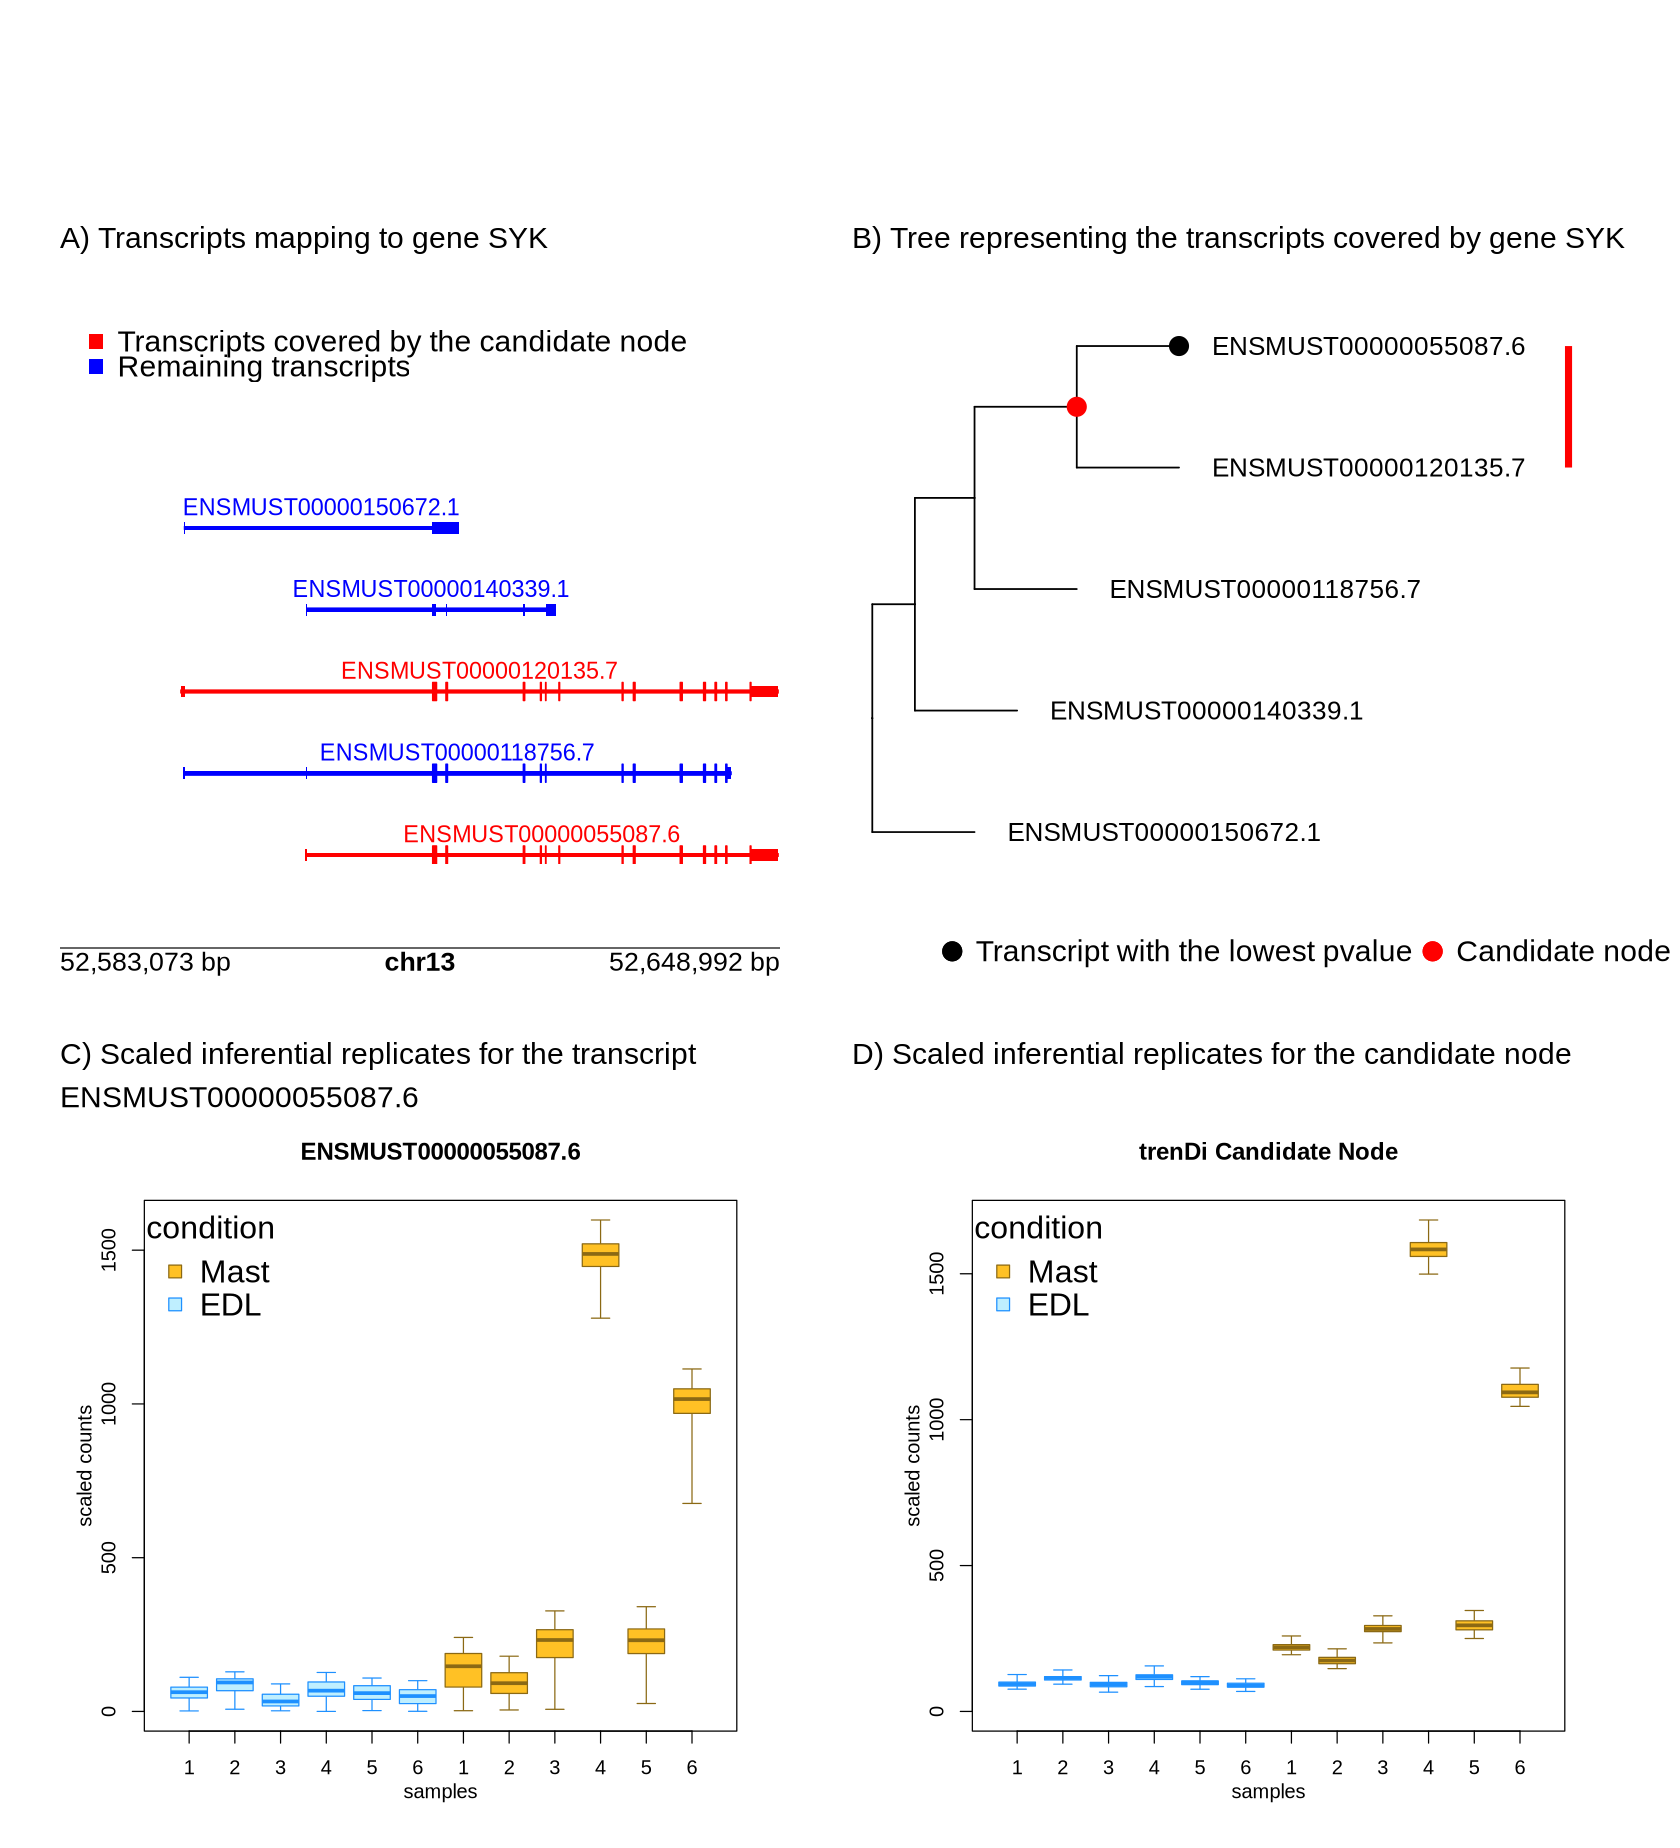

In [15]:
i <- 1
j <- 283
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=45, xlim=100)
pgs <- parF(tt$g, tt$txShow, tt$tSub)

options(repr.plot.width=14, repr.plot.height=15.4)
library(plotgardener)
pageCreate(width = 14, height = 12, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene SYK", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 5.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 6.2, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene SYK", 
         x = 7.1, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.5, width = 8, height=6
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000055087.6", 
         x = 0.5, y = 7, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 7.6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 7, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 7.6, width = 6, height=6
)

[1] "ENSMUST00000089338.5" "ENSMUST00000171503.7"
[1] "Genes ENSMUSG00000034623"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000171503.7" "ENSMUST00000089338.5" "ENSMUST00000169113.1" 
[1] "ENSMUST00000089338.5" "ENSMUST00000171503.7" "ENSMUST00000169113.1"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



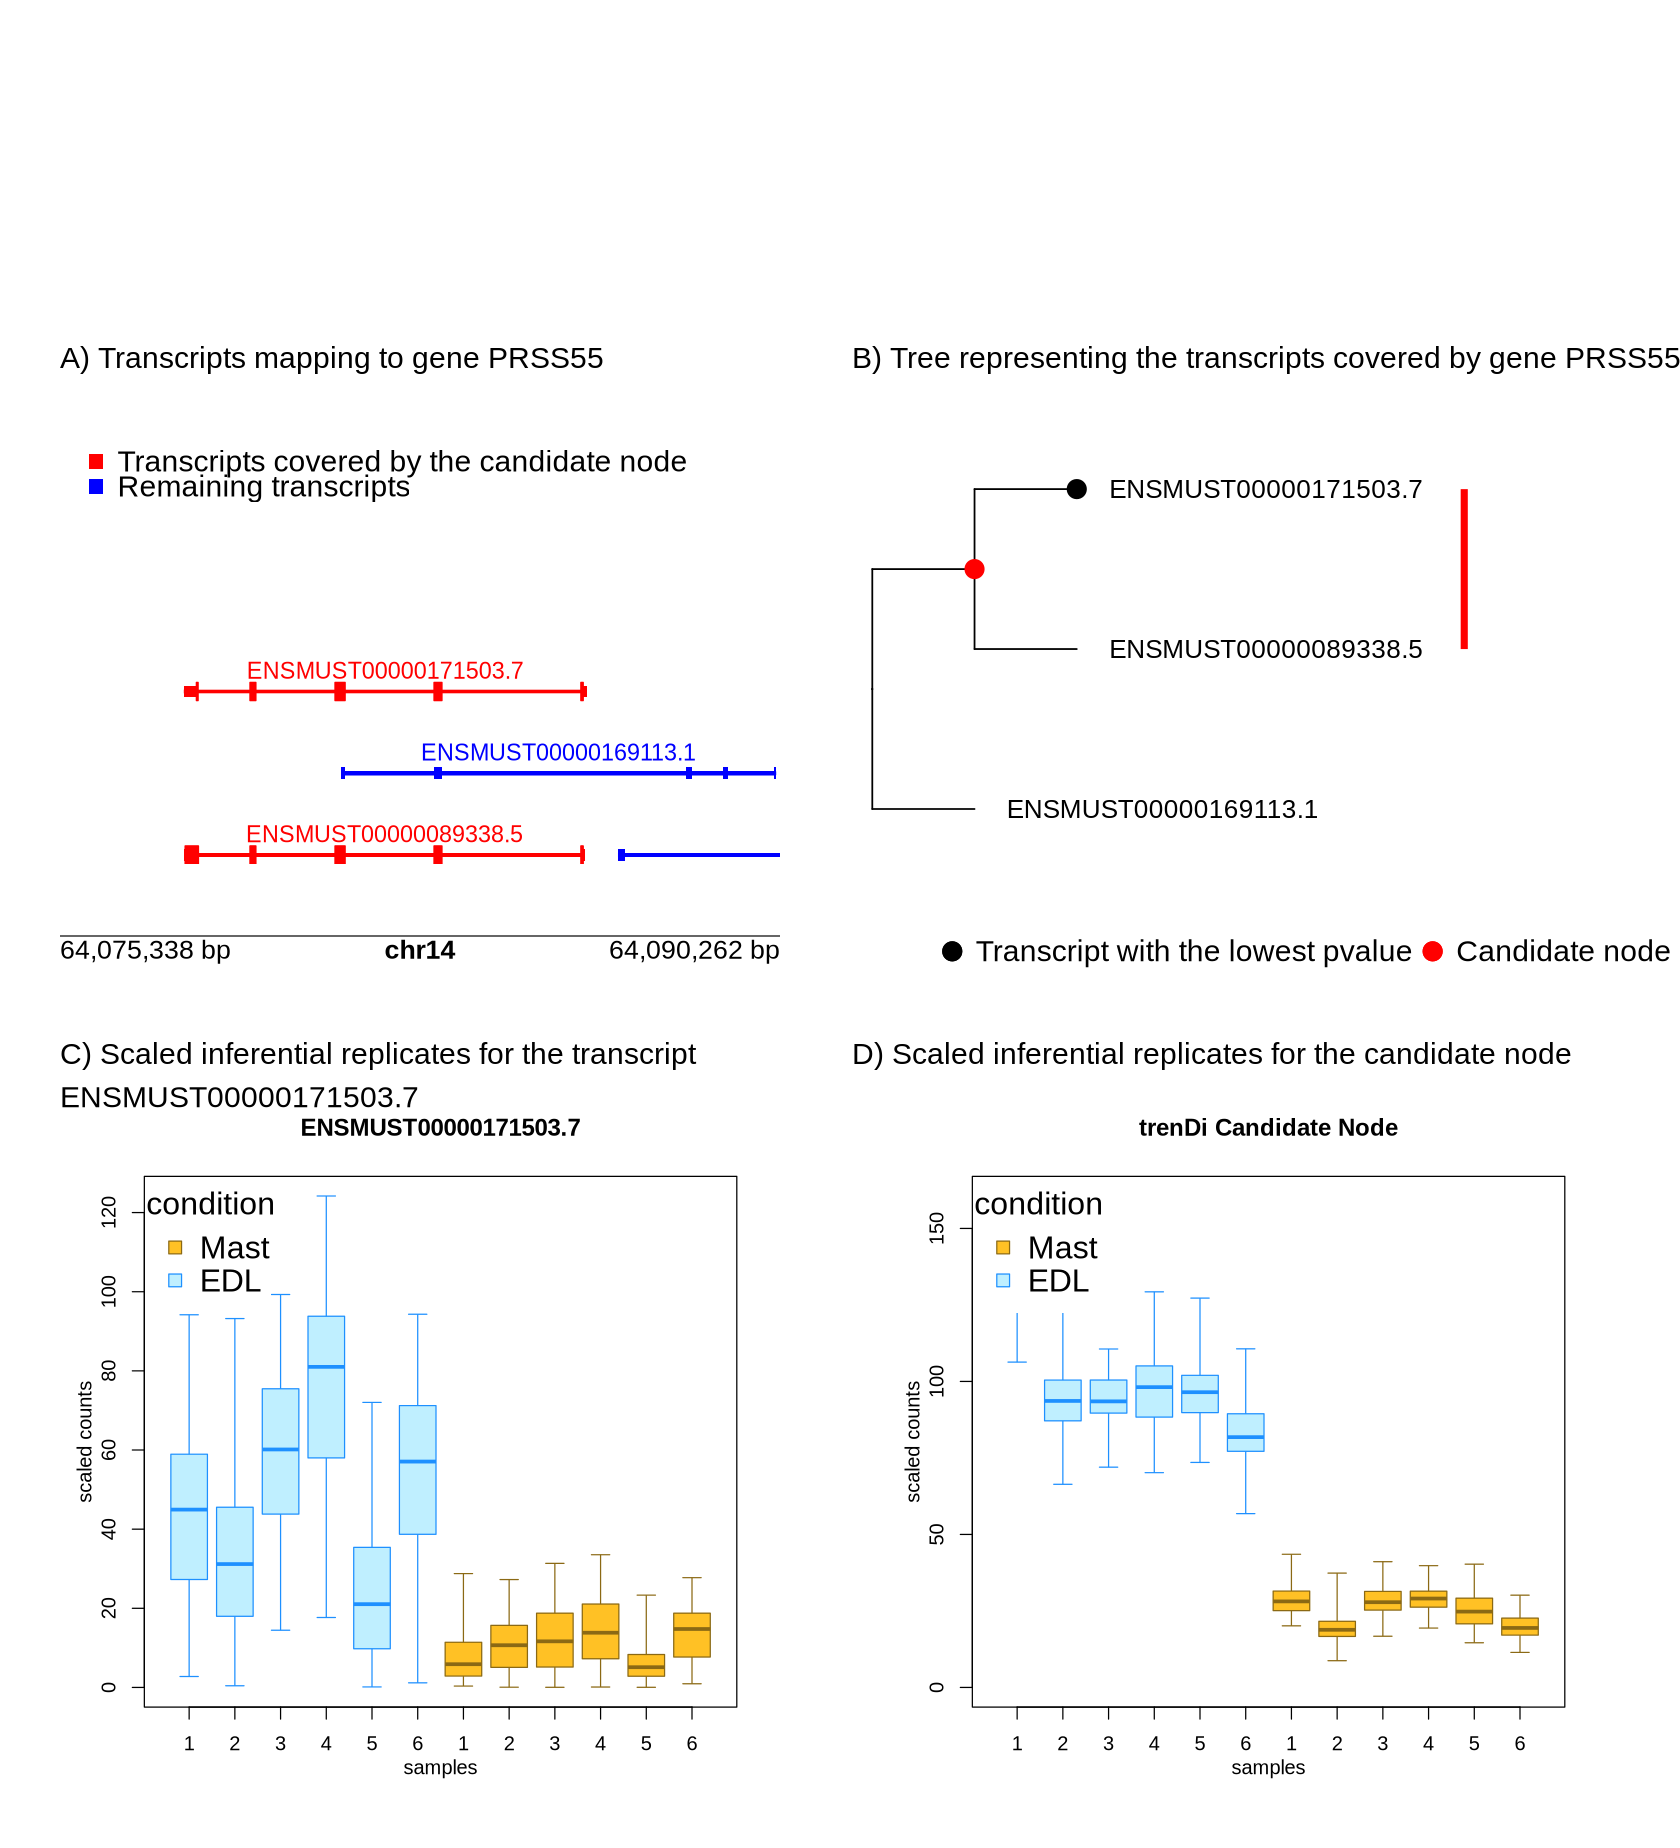

In [18]:
i <- 1
j <- 17
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left")
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=45, xlim=100)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 100,fs=14)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")
parTxp  <- pgParams(
    fontsize = 14,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene PRSS55", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 4.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)


plotGenomeLabel(
  params = par, x = 0.5, y = 5.1, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene PRSS55", 
         x = 7.1, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.5, width = 8, height=5
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000171503.7", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.4, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6.4, width = 6, height=6
)

[1] "ENSMUST00000141294.1" "ENSMUST00000142448.7" "ENSMUST00000138821.7"
[1] "Genes ENSMUSG00000055632"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000113532.8" "ENSMUST00000226996.1" "ENSMUST00000130375.1" 
              tx_name4               tx_name5               tx_name6 
"ENSMUST00000138821.7" "ENSMUST00000142448.7" "ENSMUST00000141294.1" 
[1] "ENSMUST00000130375.1" "ENSMUST00000226996.1" "ENSMUST00000113532.8"
[4] "ENSMUST00000141294.1" "ENSMUST00000142448.7" "ENSMUST00000138821.7"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



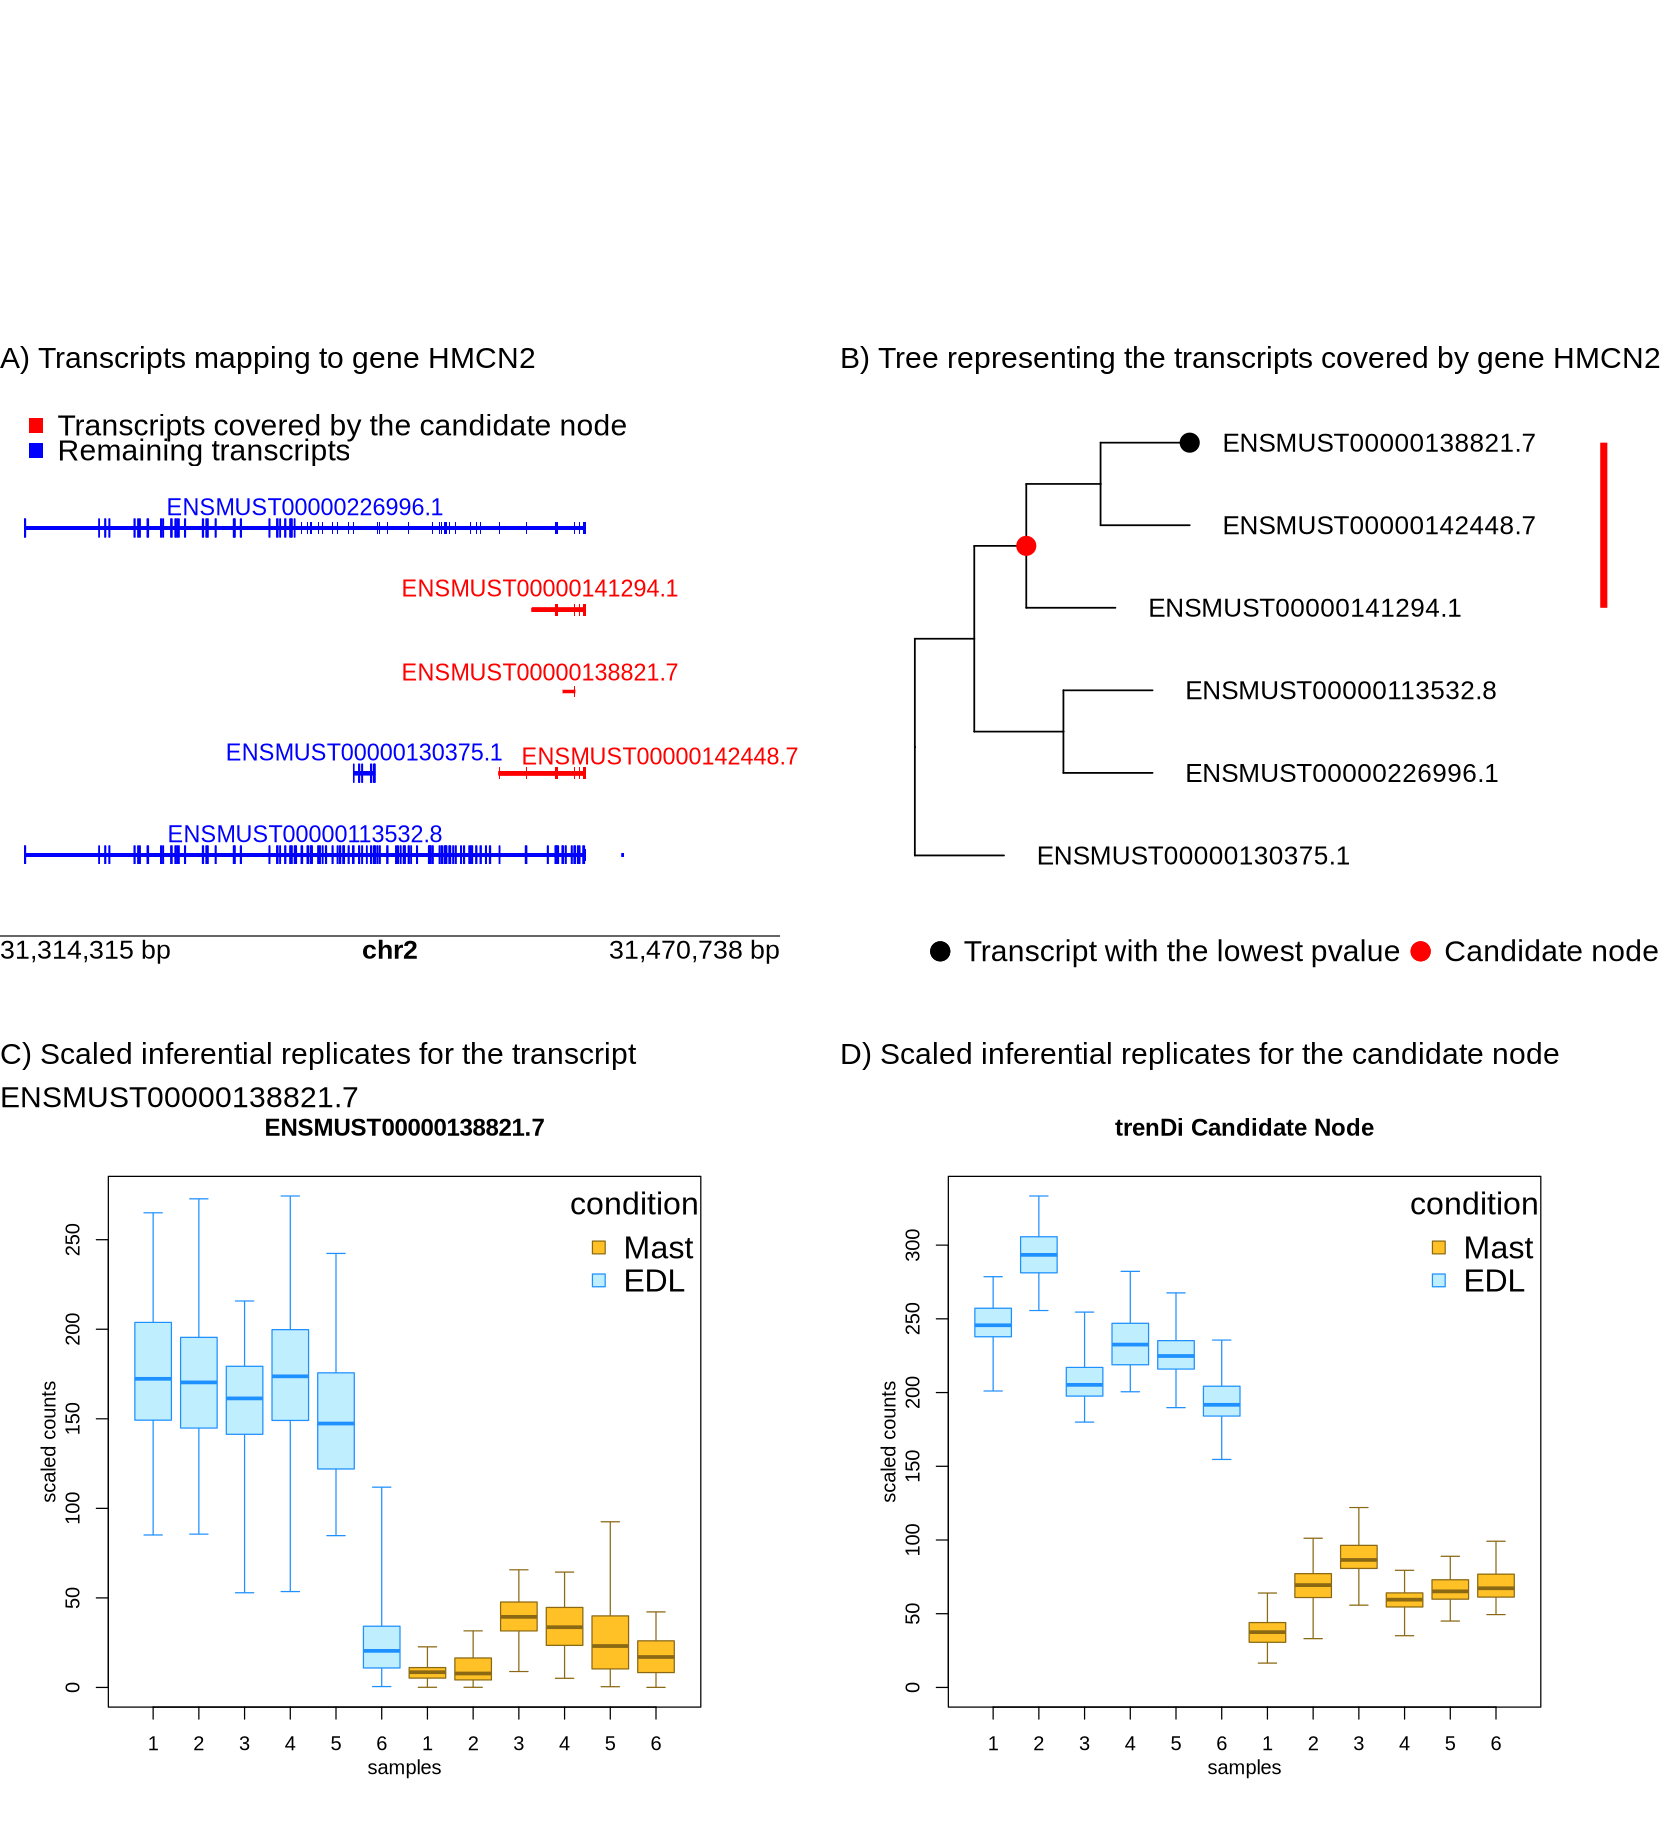

In [19]:
i <- 1
j <- 206
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right")
pTree <- plotTree(tt$tSub, 10, tt$minTInd, of=55, xlim=100)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 10000,fs=14)

library(plotgardener)
pageCreate(width = 16, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")
parTxp  <- pgParams(
    fontsize = 14,
    fontcolor="red"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 1, y = 0.7, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene HMCN2", x = 1, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1.2, y = 4.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
   
plotText(label="ENSMUST00000138821.7", x = 5.5, y = 2.9,
        params = parTxp)
plotText(label="ENSMUST00000142448.7", x = 6.5, y = 3.6,
        params = parTxp)
plotText(label="ENSMUST00000141294.1", x = 5.5, y = 2.2,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 1, y = 5.1, length=6.5,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene HMCN2", 
         x = 8, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 8.2, y =0.5, width = 7, height=5
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000138821.7", 
         x = 1, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 1.2, y = 6.4, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 8, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 8.2, y = 6.4, width = 6, height=6
)

[1] "ENSMUST00000210192.1"  "ENSMUST00000032927.13" "ENSMUST00000164479.8" 
[4] "ENSMUST00000167888.8" 
[1] "Genes ENSMUSG00000030688"
               tx_name1                tx_name2                tx_name3 
 "ENSMUST00000163799.8"  "ENSMUST00000164479.8" "ENSMUST00000032927.13" 
               tx_name4                tx_name5                tx_name6 
 "ENSMUST00000210192.1"  "ENSMUST00000172630.7"  "ENSMUST00000174291.7" 
               tx_name7                tx_name8                tx_name9 
 "ENSMUST00000167888.8"  "ENSMUST00000173270.7"  "ENSMUST00000174083.1" 
              tx_name10 
 "ENSMUST00000174140.1" 
 [1] "ENSMUST00000210192.1"  "ENSMUST00000032927.13" "ENSMUST00000164479.8" 
 [4] "ENSMUST00000167888.8"  "ENSMUST00000174291.7"  "ENSMUST00000174140.1" 
 [7] "ENSMUST00000173270.7"  "ENSMUST00000172630.7"  "ENSMUST00000163799.8" 
[10] "ENSMUST00000174083.1"  "ENSMUST00000172662.1" 
[1] FALSE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



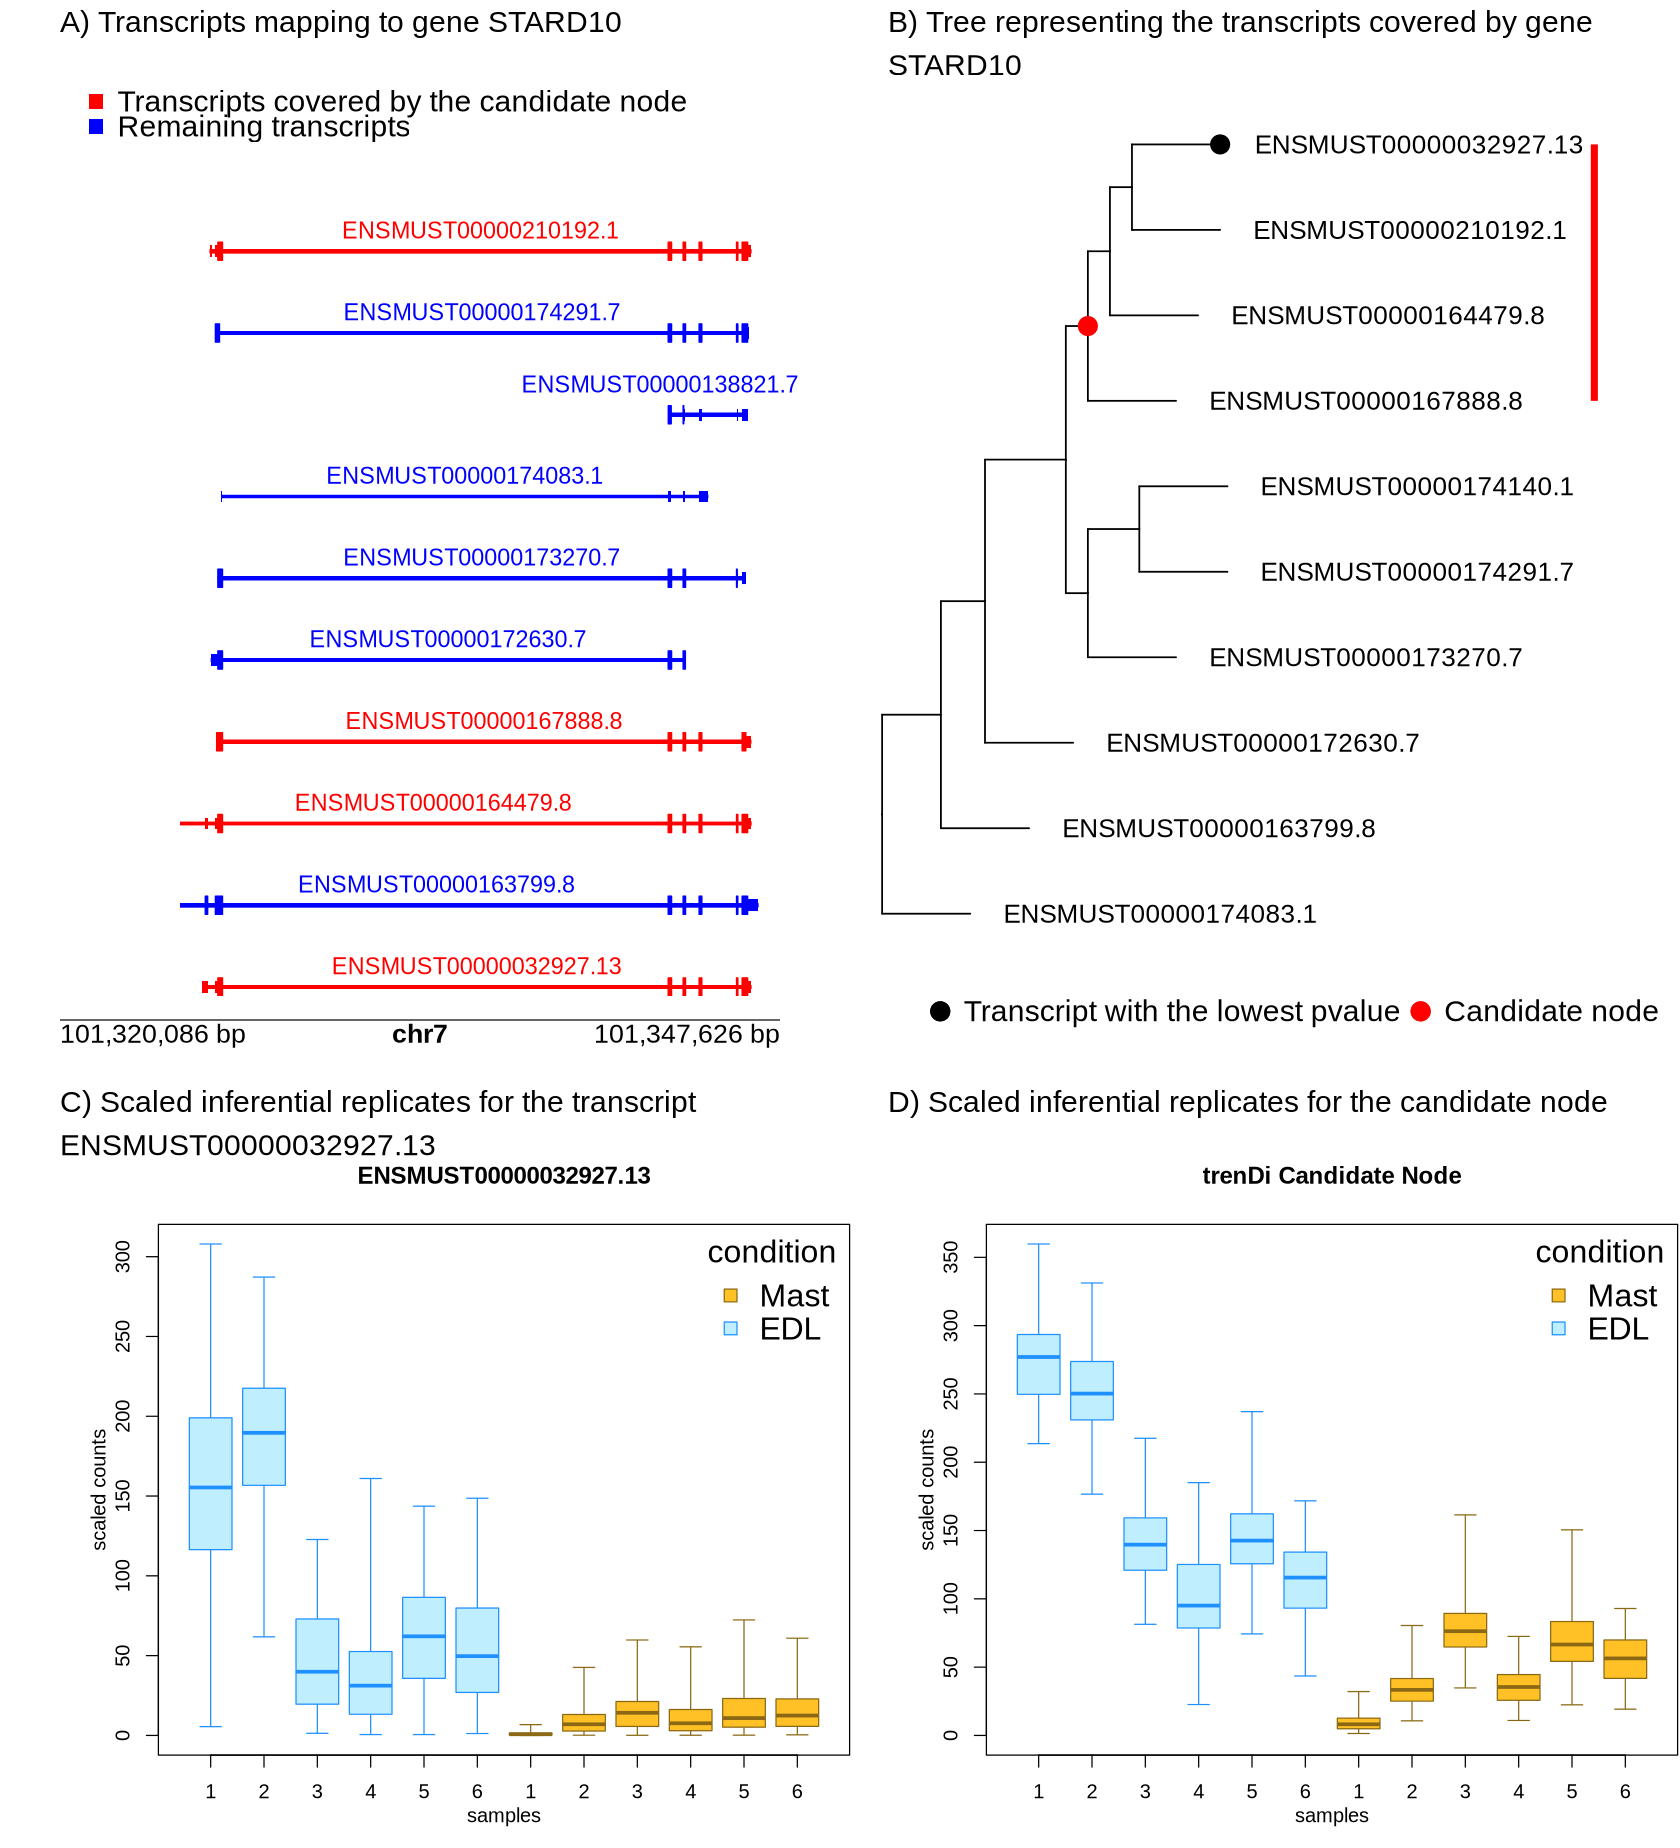

In [20]:
i <- 1
j <- 21
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
tt$tSub <- drop.tip(tt$tSub,
         setdiff(tt$tSub$tip.label, txpMouse %>% 
                 filter(ensID=="ENSMUSG00000030688") %>%
                 data.frame  %>% select(tx_name) %>% unlist))
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right")
pTree <- plotTree(tt$tSub, 15, tt$minTInd, of=50, xlim=110)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = -3000, chromEnd=1000,fs=14)
parTxp  <- pgParams(
    fontsize = 14,
    fontcolor="blue"
)

library(plotgardener)
pageCreate(width = 14, height = 16, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene STARD10", x = 0.5, y = 0.4,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 8.6, width = 5, height = 8, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSMUST00000138821.7", x = 5.5, y = 3.5,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 0.5, y = 8.8, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene \nSTARD10", 
         x = 7.4, y = 0.4, params = parText)
plotGG(
    plot = pTree,
    x = 6.9, y =1, width = 7.6, height=8
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000032927.13", 
         x = 0.5, y = 9.4, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 9.8, width = 7, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.4, y = 9.4, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 9.8, width = 7, height=6
)

[1] "ENSMUST00000114025.7" "ENSMUST00000177904.7" "ENSMUST00000114024.8"
[1] "Genes ENSMUSG00000047996"
              tx_name1               tx_name2               tx_name3 
"ENSMUST00000177904.7" "ENSMUST00000114025.7" "ENSMUST00000114024.8" 
              tx_name4               tx_name5               tx_name6 
"ENSMUST00000126209.7" "ENSMUST00000126994.7" "ENSMUST00000156427.1" 
              tx_name7               tx_name8 
"ENSMUST00000134602.7" "ENSMUST00000132852.7" 
[1] "ENSMUST00000134602.7" "ENSMUST00000114025.7" "ENSMUST00000177904.7"
[4] "ENSMUST00000114024.8" "ENSMUST00000126209.7" "ENSMUST00000156427.1"
[7] "ENSMUST00000126994.7" "ENSMUST00000132852.7"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



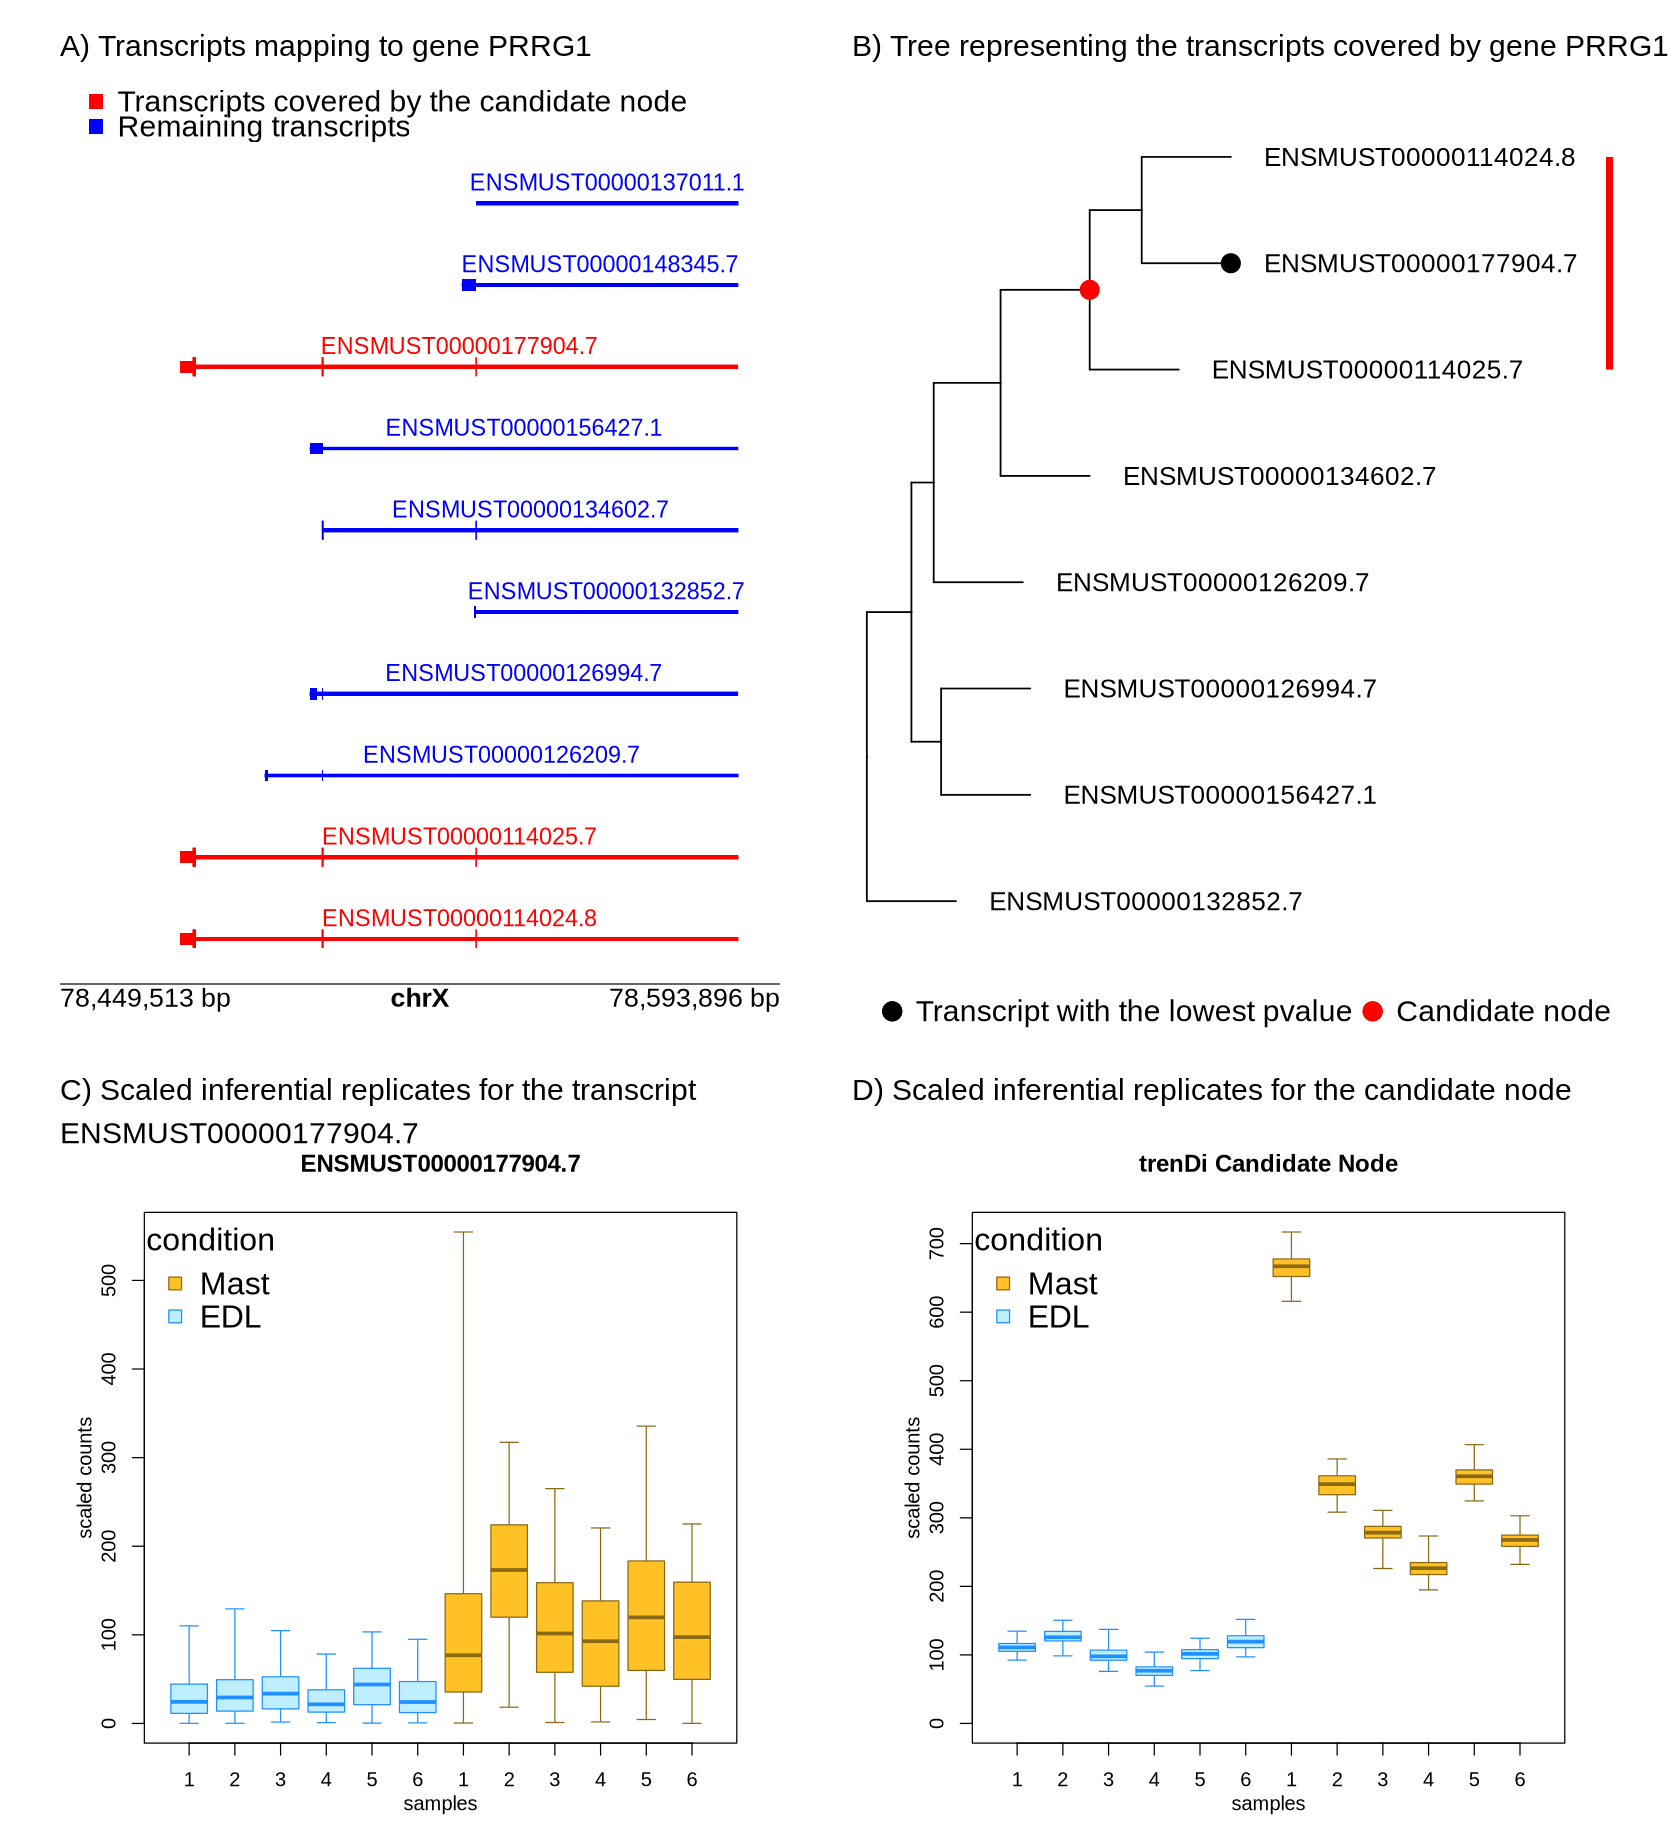

In [21]:
i <- 1
j <- 72
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left")
pTree <- plotTree(tt$tSub, 13, tt$minTInd, of=50, xlim=100)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 10000,fs=14)

library(plotgardener)
pageCreate(width = 14, height = 15, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene PRRG1", x = 0.5, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 7.7, width = 5, height = 7, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)


plotGenomeLabel(
  params = par, x = 0.5, y = 8, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene PRRG1", 
         x = 7.1, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.5, width = 7, height=8
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000177904.7", 
         x = 0.5, y = 8.8, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 9.2, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 8.8, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 9.2, width = 6, height=6
)

[1] "ENSMUST00000132328.7" "ENSMUST00000151906.7"
[1] "Genes ENSMUSG00000034164"
               tx_name1                tx_name2                tx_name3 
 "ENSMUST00000132328.7" "ENSMUST00000062821.12"  "ENSMUST00000163299.7" 
               tx_name4                tx_name5                tx_name6 
 "ENSMUST00000151906.7"  "ENSMUST00000132196.1"  "ENSMUST00000153308.1" 
               tx_name7                tx_name8 
 "ENSMUST00000156492.1"  "ENSMUST00000138551.1" 
[1] "ENSMUST00000132328.7"  "ENSMUST00000151906.7"  "ENSMUST00000062821.12"
[4] "ENSMUST00000163299.7"  "ENSMUST00000132196.1"  "ENSMUST00000156492.1" 
[7] "ENSMUST00000138551.1"  "ENSMUST00000153308.1" 
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]

text[text2]

text[text2]



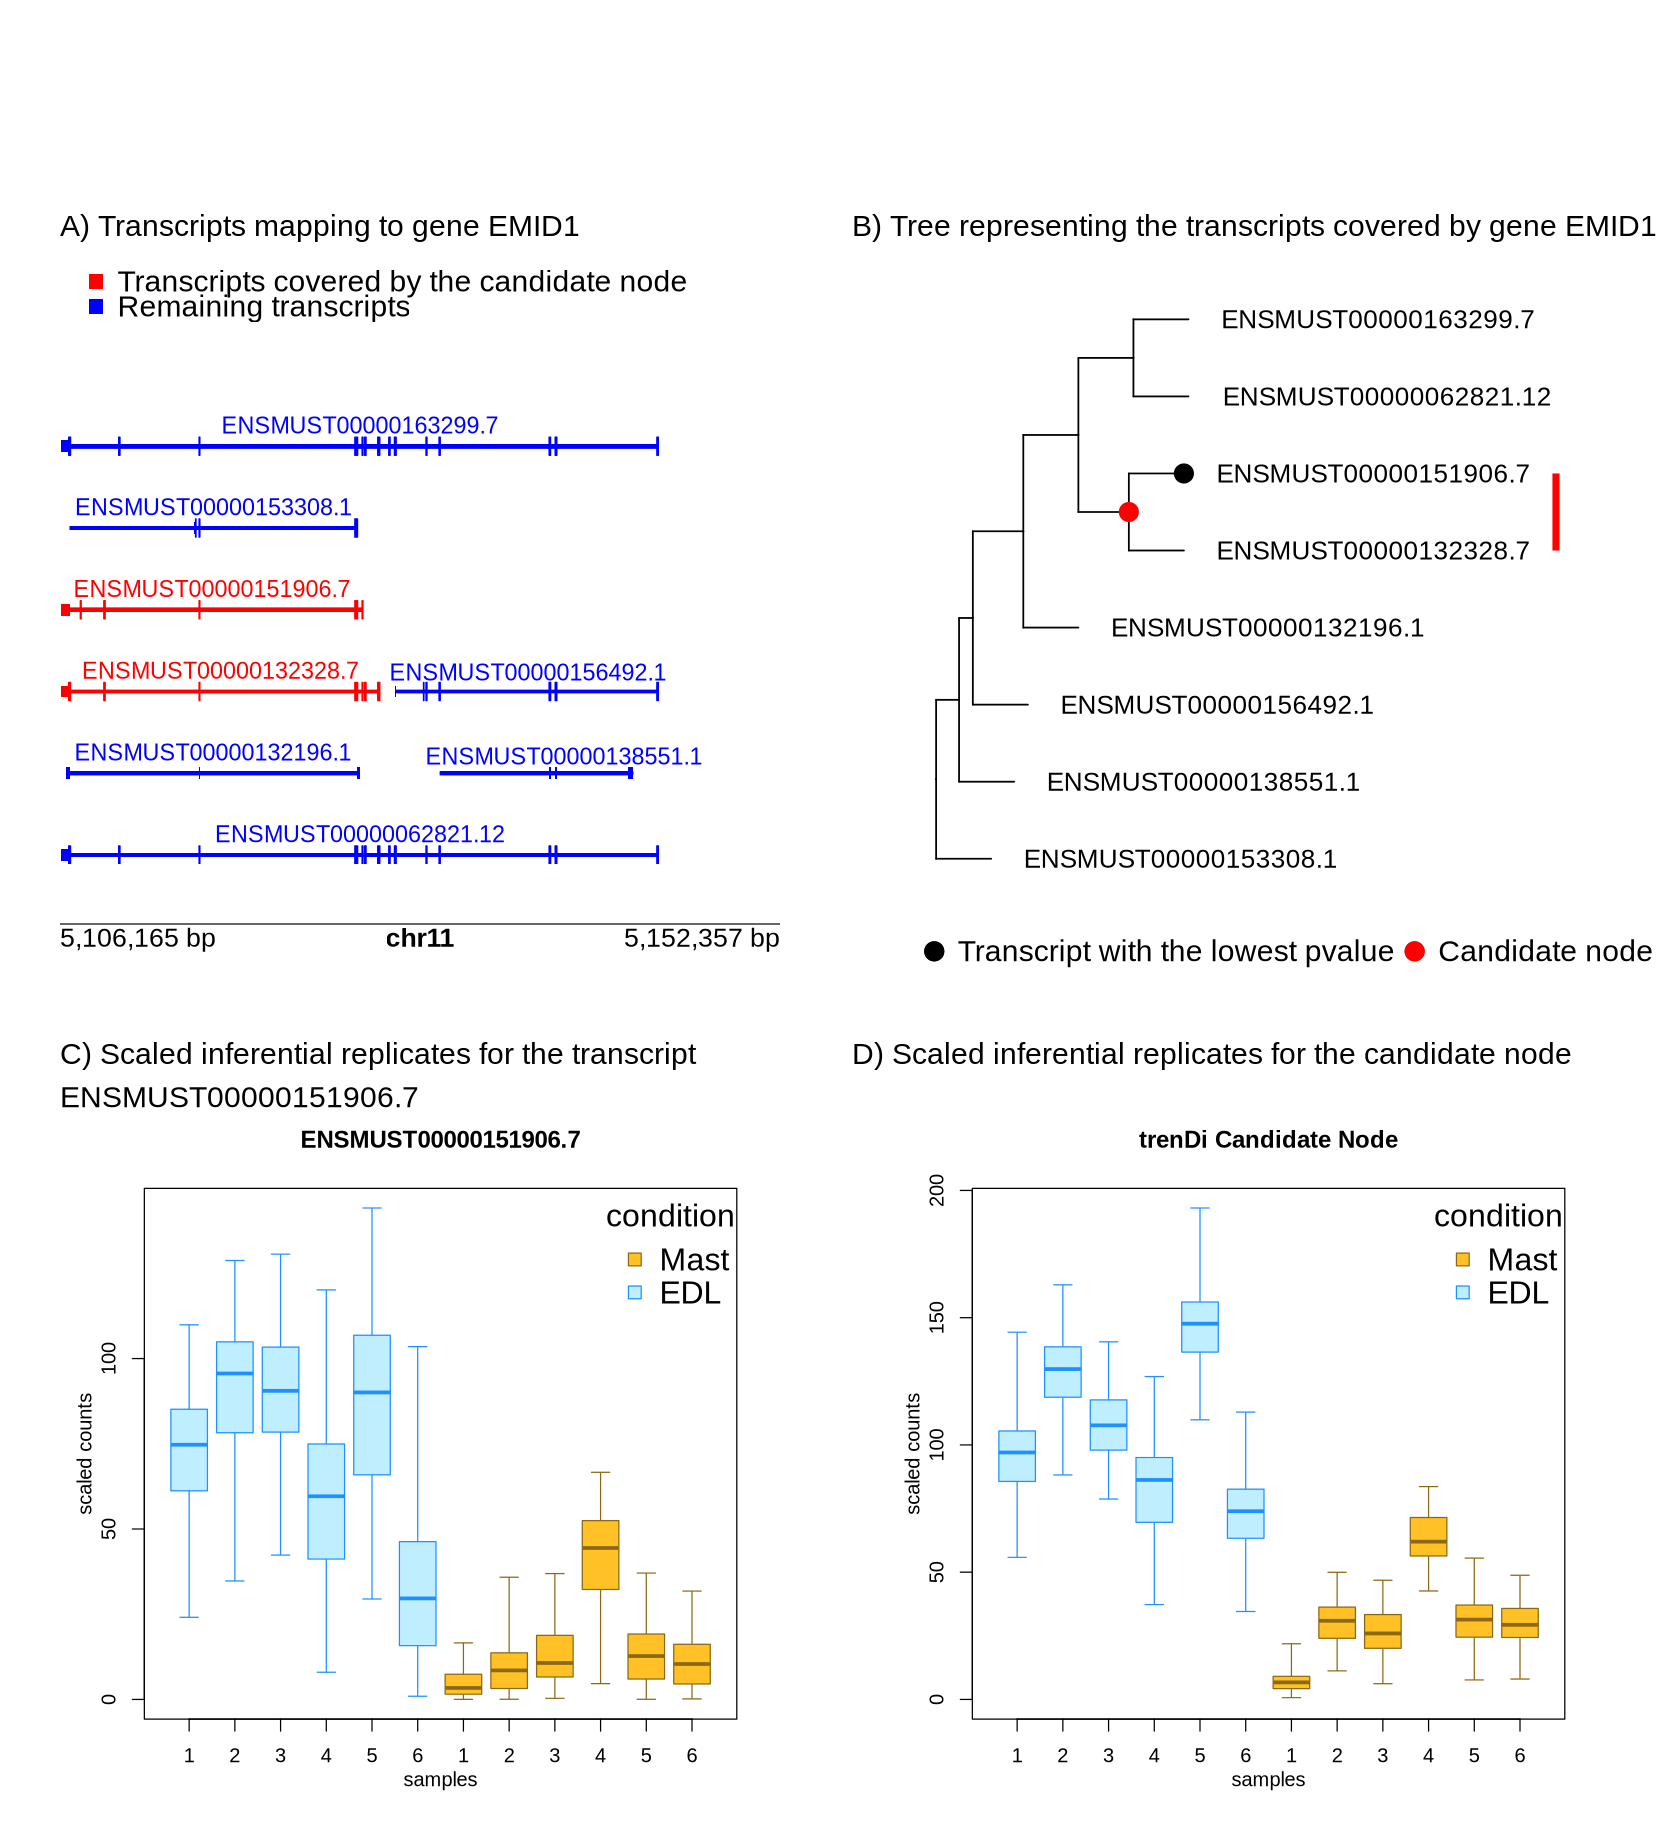

In [22]:
#137
i <- 1
j <- 30
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right")
pTree <- plotTree(tt$tSub, 14, tt$minTInd, of=80, xlim=150)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 100,fs=14)

pageCreate(width = 14, height = 12, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")
parTxp  <- pgParams(
    fontsize = 14,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene EMID1", x = 0.5, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 0.5, y = 5.5, width = 5, height = 7.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)


plotGenomeLabel(
  params = par, x = 0.5, y = 6, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene EMID1", 
         x = 7.1, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 7.4, y =0.5, width = 6.5, height=6
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000151906.7", 
         x = 0.5, y = 7, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 7.5, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 7, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 7.5, width = 6, height=6
)

plotText(label="ENSMUST00000156492.1", x = 4.4, y = 3.9,
        params = parTxp)
plotText(label="ENSMUST00000138551.1", x = 4.7, y = 4.6,
        params = parTxp)

[1] "ENSMUST00000113594.7"  "ENSMUST00000071944.12" "ENSMUST00000073843.12"
[1] "Genes ENSMUSG00000029217"
               tx_name1                tx_name2                tx_name3 
"ENSMUST00000071944.12"  "ENSMUST00000113594.7"  "ENSMUST00000126481.7" 
               tx_name4                tx_name5                tx_name6 
 "ENSMUST00000155342.7" "ENSMUST00000073843.12"  "ENSMUST00000138842.7" 
               tx_name7                tx_name8                tx_name9 
 "ENSMUST00000149533.7"  "ENSMUST00000150193.1"  "ENSMUST00000202547.1" 
[1] "ENSMUST00000138842.7"  "ENSMUST00000155342.7"  "ENSMUST00000113594.7" 
[4] "ENSMUST00000071944.12" "ENSMUST00000073843.12" "ENSMUST00000126481.7" 
[7] "ENSMUST00000149533.7"  "ENSMUST00000202547.1"  "ENSMUST00000150193.1" 
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]

text[text2]

text[text2]



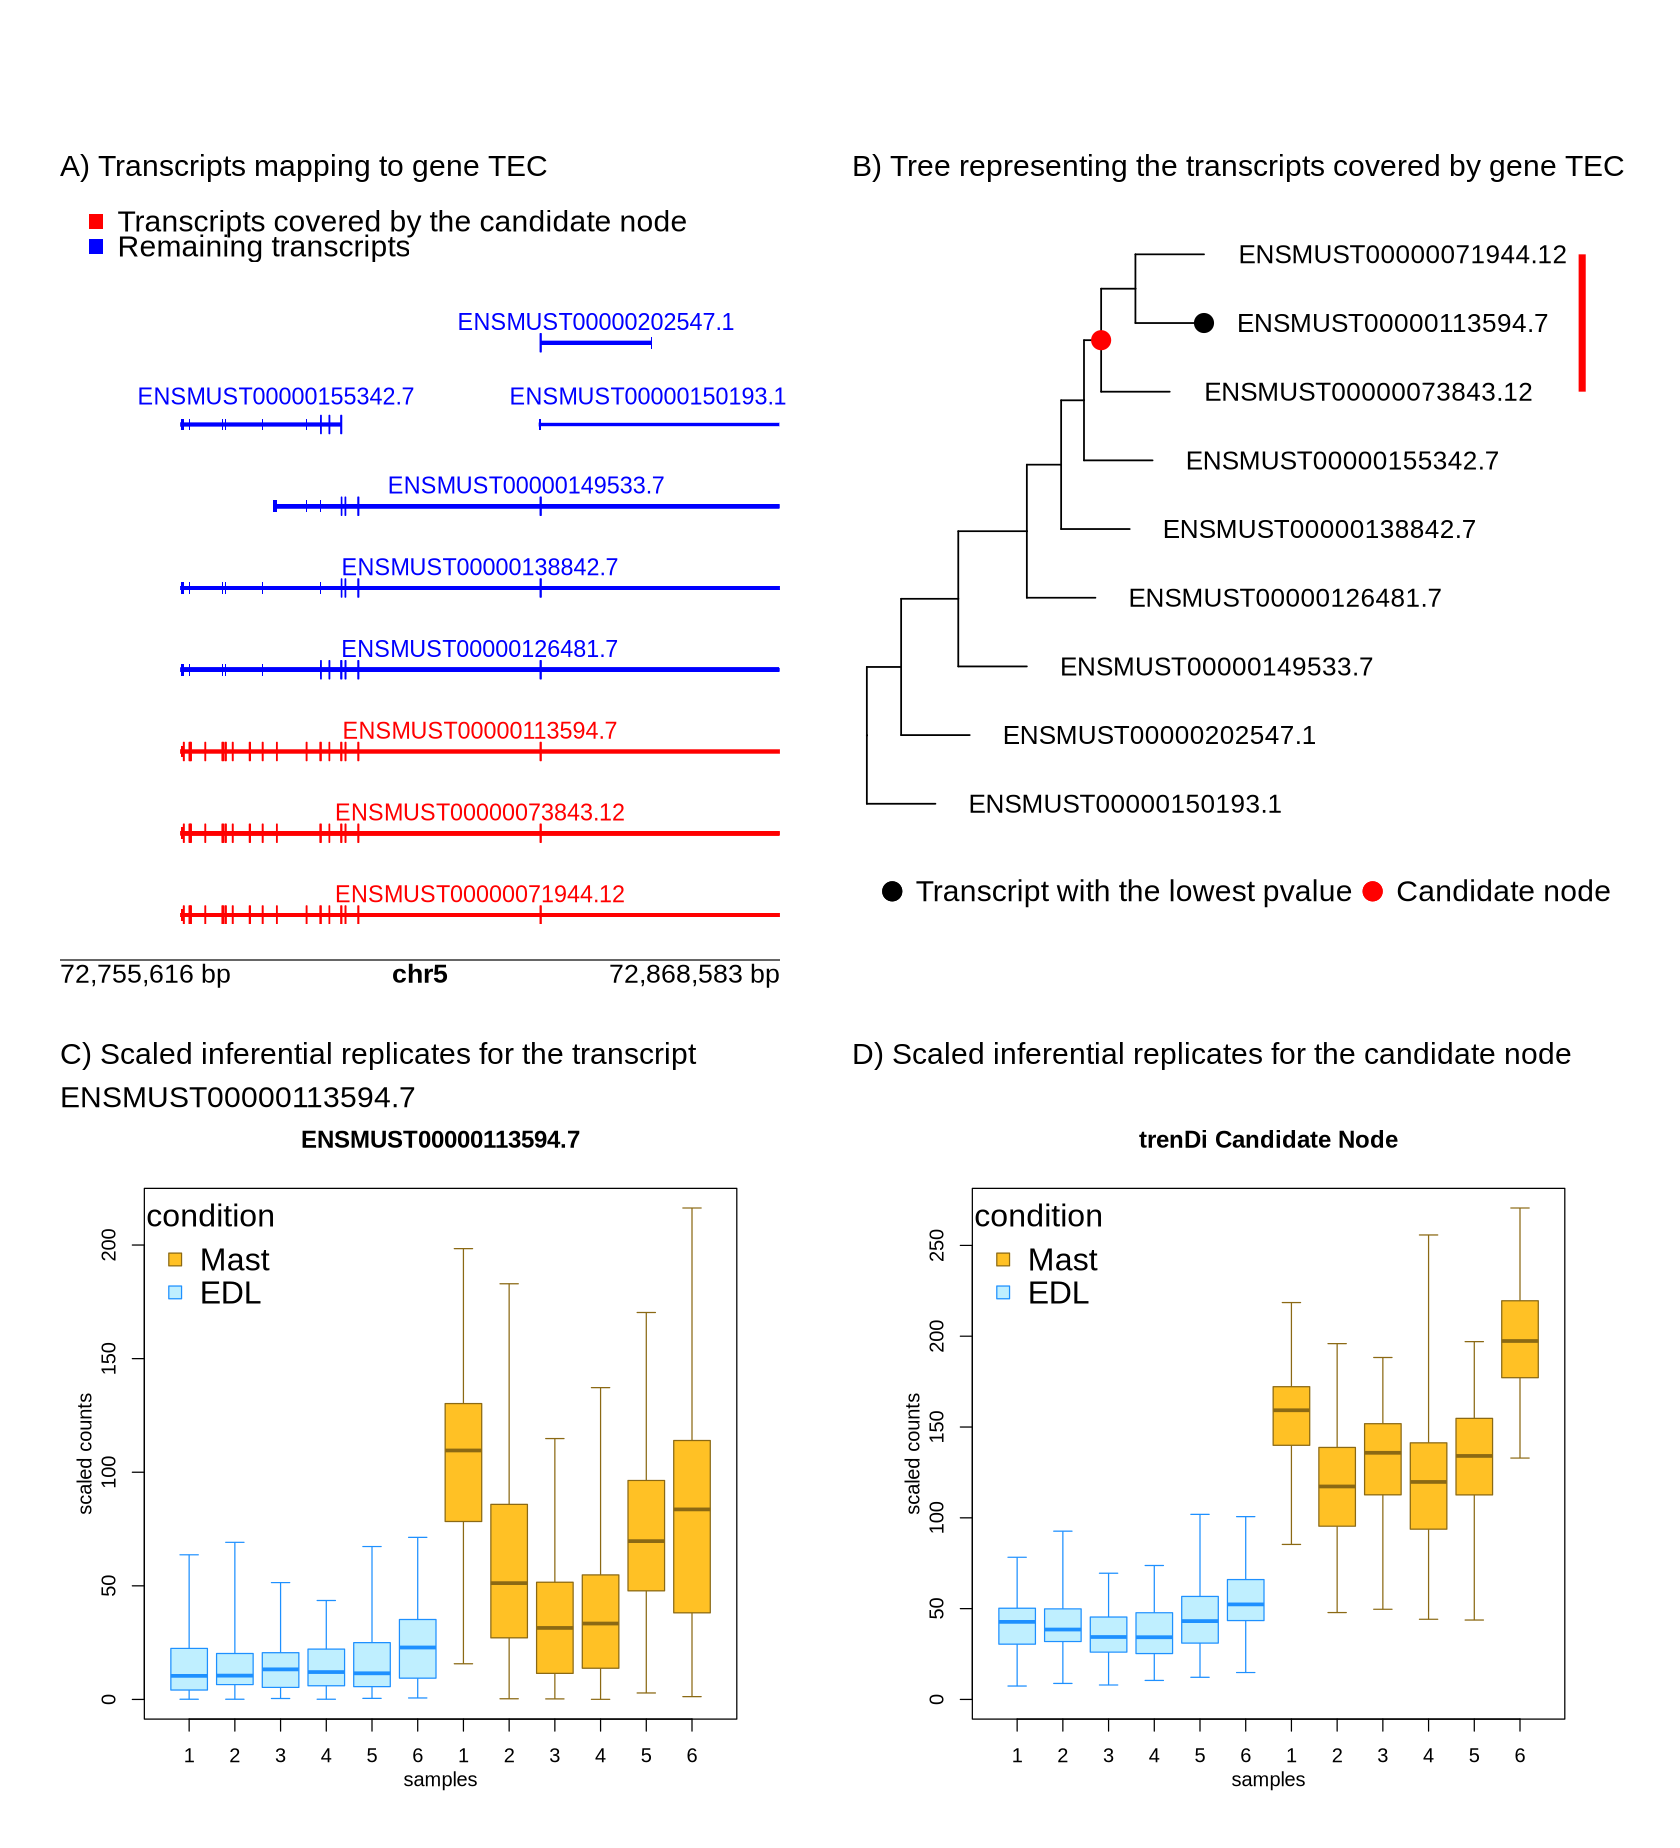

In [23]:
i <- 1
j <- 239
tt <- extPreInf(tseCons, yTxps, trenDiNodes, trenDiDegNodes, txpMouse, genesMouse, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left")
pTree <- plotTree(tt$tSub, 16, tt$minTInd, of=65, xlim=130)
pgs <- parF(tt$g, tt$txShow, tt$tSub, chromSt = 100, chromEnd = 100,fs=14)

library(plotgardener)
pageCreate(width = 14, height = 13, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene TEC", x = 0.5, y = 0.1,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 6.5, width = 5, height = 7, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)


plotGenomeLabel(
  params = par, x = 0.5, y = 6.8, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene TEC", 
         x = 7.1, y = 0.1, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.5, width = 7, height=6
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSMUST00000113594.7", 
         x = 0.5, y = 7.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 8, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 7.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 8, width = 6, height=6
)

plotText(label="ENSMUST00000150193.1" , x = 5.4, y = 2.1,
        params = parTxp)
plotText(label="ENSMUST00000155342.7", x = 2.3, y = 2.1,
        params = parTxp)